# load data

In [ ]:
from soar.preprocess import get_dataset, reformat_solutions_parquet
import pandas as pd
import numpy as np

# download files here: https://huggingface.co/datasets/julien31/soar_arc_train_5M
path="your_path/train_part_0.parquet"
df = pd.read_parquet(path)

path_soar = "your_path.../SOAR/" # path to SOAR repository
train_data, val_data, _ = get_dataset(data_path=path_soar,arc_2=False)
data2test = train_data
dict_solutions = reformat_solutions_parquet(df)


/home/flowers/work/SOAR/arc-prize-2024/
/home/flowers/work/SOAR/arc-prize-2024/arc-agi_training_challenges.json


# Examples of code and outputs grid
plot contain input, the correct output (correct), and the output generated by the code (predicted)

Task ID: ded97339
----------------------------------------------------------------------------------------------------------------------------------------------------------------


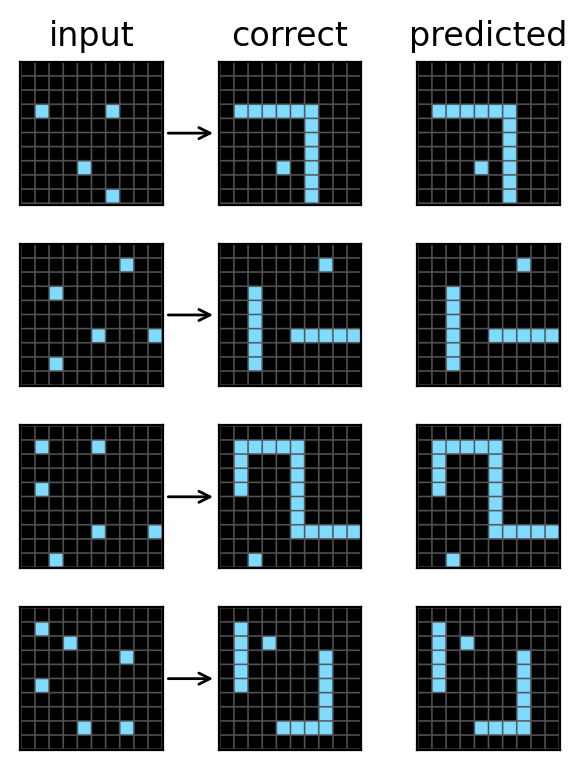

def transform(grid: list[list[int]]) -> list[list[int]]:

    def fill_line(grid, start, end, color):
        min_row, min_col = (min(start[0], end[0]), min(start[1], end[1]))
        max_row, max_col = (max(start[0], end[0]), max(start[1], end[1]))
        if min_row == max_row:
            for col in range(min_col, max_col + 1):
                grid[min_row][col] = color
        elif min_col == max_col:
            for row in range(min_row, max_row + 1):
                grid[row][min_col] = color
    colored_cells = []
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            if grid[i][j] != 0:
                colored_cells.append((i, j))
    for i in range(len(colored_cells)):
        for j in range(i + 1, len(colored_cells)):
            cell1 = colored_cells[i]
            cell2 = colored_cells[j]
            if cell1[0] == cell2[0] or cell1[1] == cell2[1]:
                fill_line(grid, cell1, cell2, grid[cell1[0]][cell1[1]])
    return grid
-------------

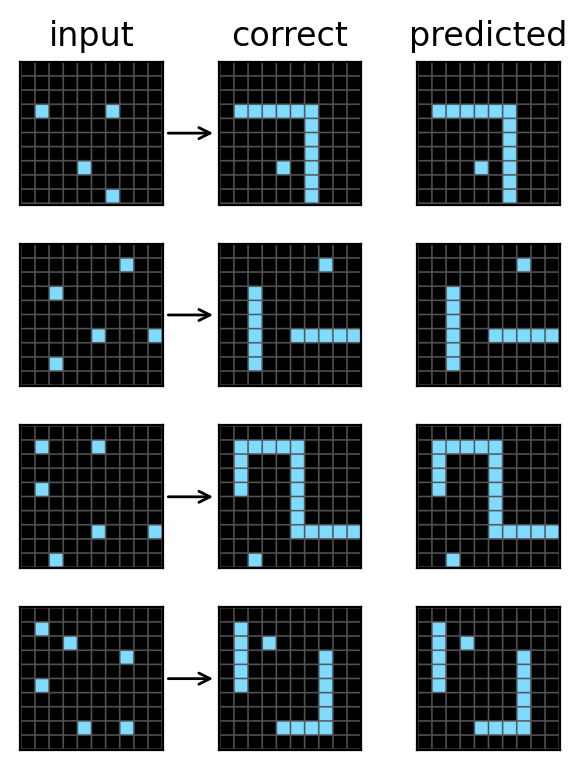

def transform(grid: list[list[int]]) -> list[list[int]]:

    def fill_region(grid, start, color):
        rows, cols = (len(grid), len(grid[0]))
        visited = [[False] * cols for _ in range(rows)]

        def dfs(x, y):
            if x < 0 or x >= rows or y < 0 or (y >= cols) or visited[x][y] or (grid[x][y] != 0):
                return
            grid[x][y] = color
            visited[x][y] = True
            dfs(x + 1, y)
            dfs(x - 1, y)
            dfs(x, y + 1)
            dfs(x, y - 1)
        for i in range(rows):
            for j in range(cols):
                if grid[i][j] == color:
                    dfs(i, j)
    positions = [(i, j) for i in range(len(grid)) for j in range(len(grid[0])) if grid[i][j] == 8]
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            start, end = (positions[i], positions[j])
            if start[0] == end[0]:
                min_col, max_col = (min(start[1], end[1]), max(start[1], end[1]))

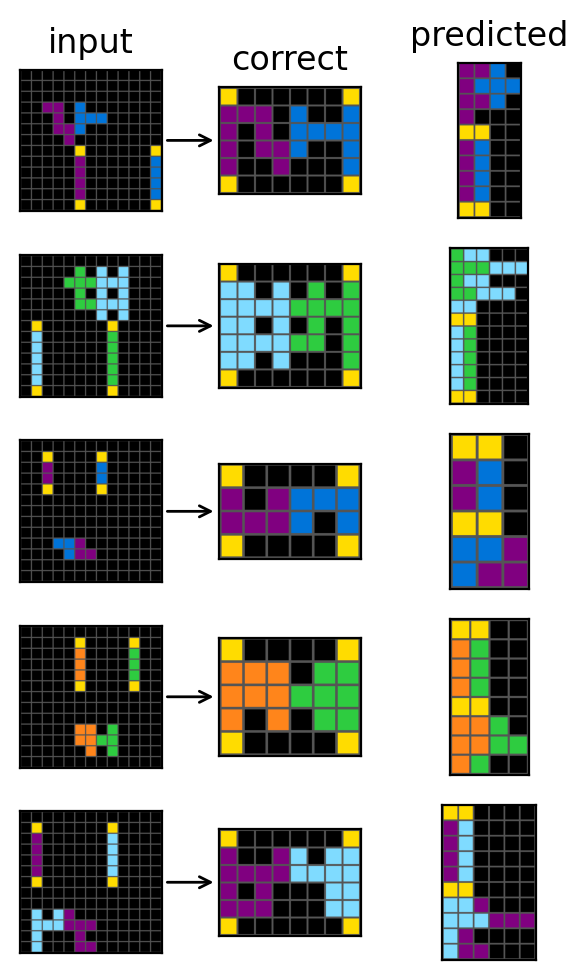

def transform(grid_lst: list[list[int]]) -> list[list[int]]:

    def extract_non_zero_rows(grid):
        rows = []
        for row in grid:
            if any((cell != 0 for cell in row)):
                rows.append(row)
        return rows

    def rotate_grid_90_clockwise(grid):
        return [list(reversed(col)) for col in zip(*grid)]

    def extract_non_zero_columns(grid):
        rotated_grid = rotate_grid_90_clockwise(grid)
        non_zero_rows = extract_non_zero_rows(rotated_grid)
        return rotate_grid_90_clockwise(non_zero_rows)

    def extract_non_zero_columns_from_rows(grid):
        rows = []
        for row in grid:
            if any((cell != 0 for cell in row)):
                rows.append([cell for cell in row if cell != 0])
        return rows

    def pad_with_zeros(grid):
        max_length = max((len(row) for row in grid))
        return [row + [0] * (max_length - len(row)) for row in grid]
    non_zero_rows = extract_non_zero_rows(grid_lst)
    non_zero_

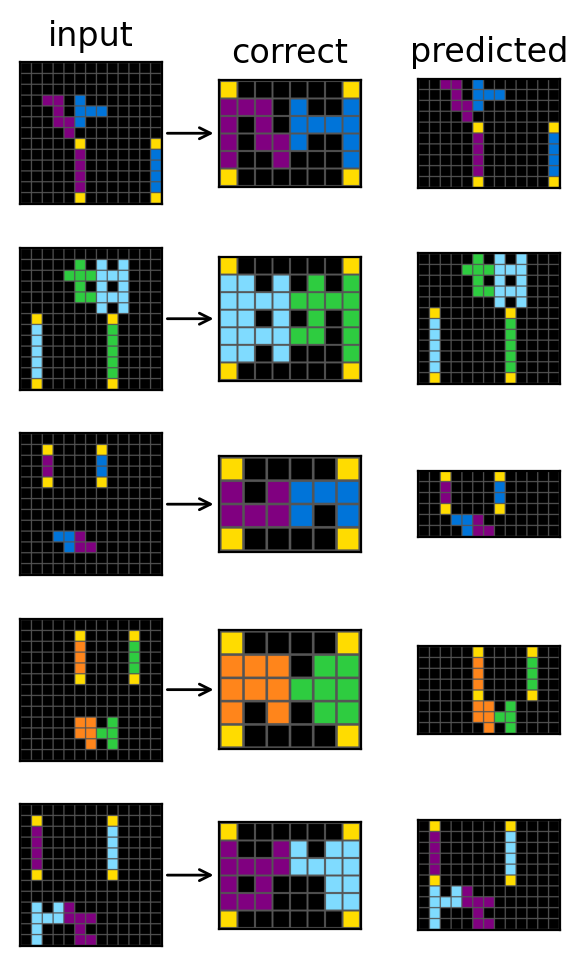

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    grid = [row for row in grid_lst if any((cell != 0 for cell in row))]
    unique_colors = sorted(set((cell for row in grid for cell in row)), key=lambda x: (x == 2, x == 1, x == 4, x == 7, x == 3, x == 8), reverse=True)
    color_positions = {color: [] for color in unique_colors}
    for row_idx, row in enumerate(grid):
        for col_idx, cell in enumerate(row):
            if cell != 0:
                color_positions[cell].append((row_idx, col_idx))
    output_grid = [[0] * len(grid[0]) for _ in range(len(grid))]
    for color in unique_colors:
        if color in color_positions:
            for row_idx, col_idx in color_positions[color]:
                output_grid[row_idx][col_idx] = color
    min_row = min((row for row in range(len(grid)) for color, positions in color_positions.items() if positions for _, col_idx in positions), default=0)
    max_row = max((row for row in range(len(grid)) for color, positions in co

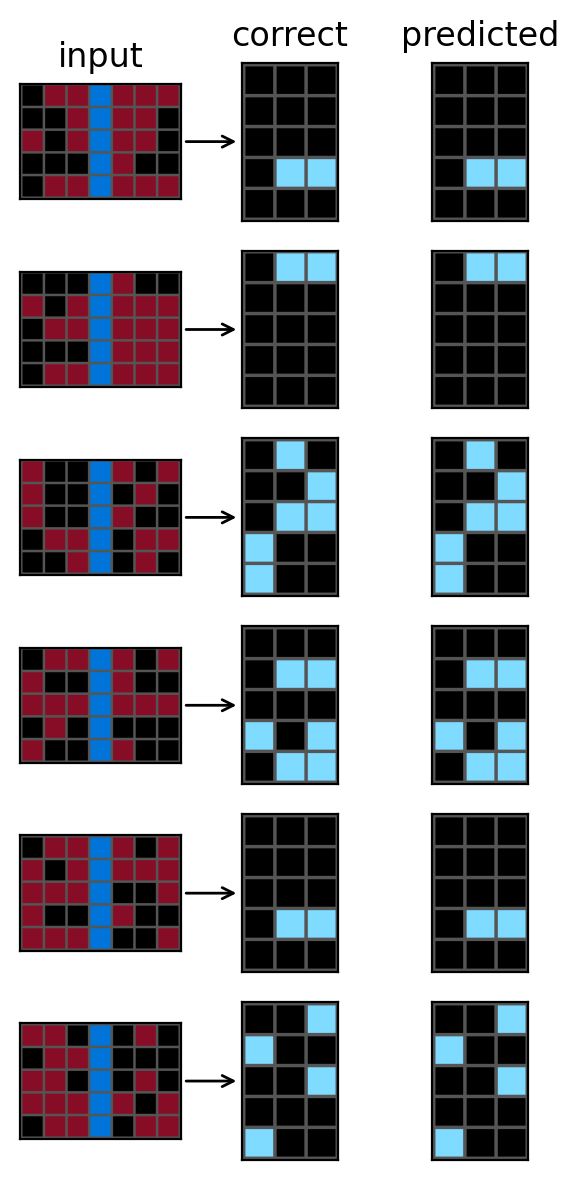

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    output_grid = [[0, 0, 0] for _ in range(5)]
    for row_idx, row in enumerate(grid_lst):
        for col in range(3):
            if row[col] == 0 and row[col + 4] == 0:
                output_grid[row_idx][col] = 8
    return output_grid
--------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------


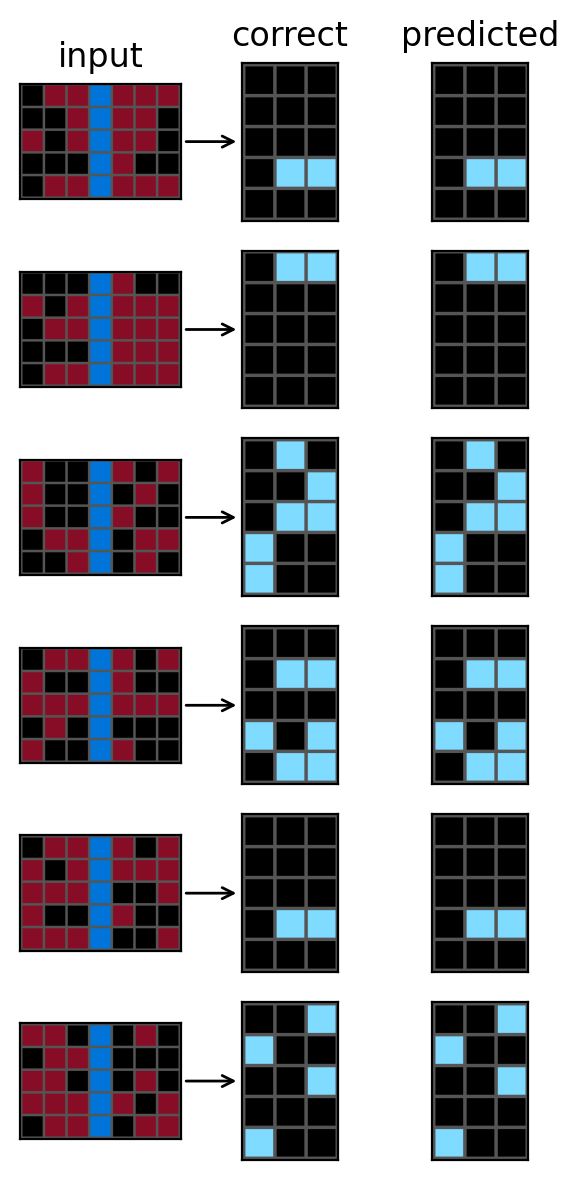

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    blue_color = 1
    purple_color = 8
    output_grid = [[0] * 3 for _ in range(len(grid_lst))]
    blue_positions = [i for i, row in enumerate(grid_lst) for j, cell in enumerate(row) if cell == blue_color and j == 3]
    for i in blue_positions:
        for j in range(3):
            if grid_lst[i][j] == 0 and grid_lst[i][j + 4] == 0:
                output_grid[i][j] = purple_color
    return output_grid
--------------------
Task ID: b548a754
----------------------------------------------------------------------------------------------------------------------------------------------------------------


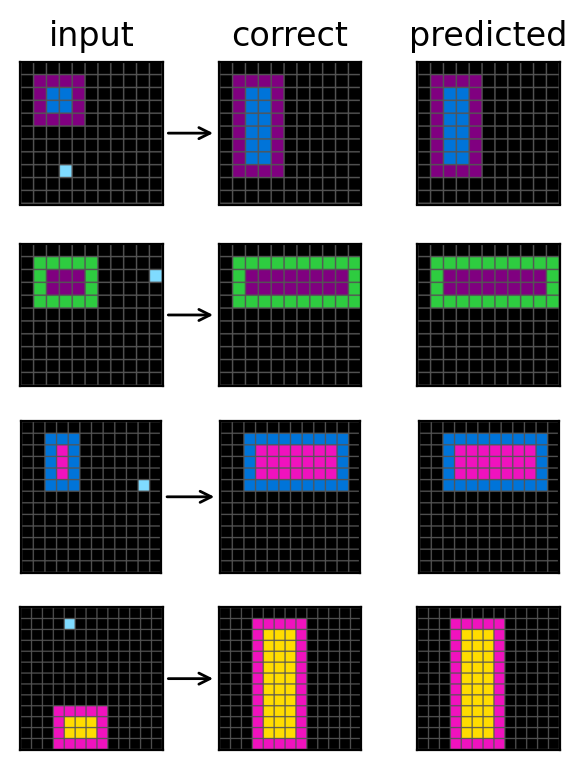

def transform(grid_lst: list[list[int]]) -> list[list[int]]:

    def expand_region(grid, min_x, max_x, min_y, max_y):
        border_colors = {}
        inner_colors = {}
        for i in range(min_x, max_x + 1):
            for j in range(min_y, max_y + 1):
                if i == min_x or i == max_x or j == min_y or (j == max_y):
                    color = grid[i][j]
                    if color != 0:
                        if color in border_colors:
                            border_colors[color] += 1
                        else:
                            border_colors[color] = 1
        for i in range(min_x + 1, max_x):
            for j in range(min_y + 1, max_y):
                color = grid[i][j]
                if color != 0:
                    if color in inner_colors:
                        inner_colors[color] += 1
                    else:
                        inner_colors[color] = 1
        border_color = max(border_colors, key=border_colors.get) if border_color

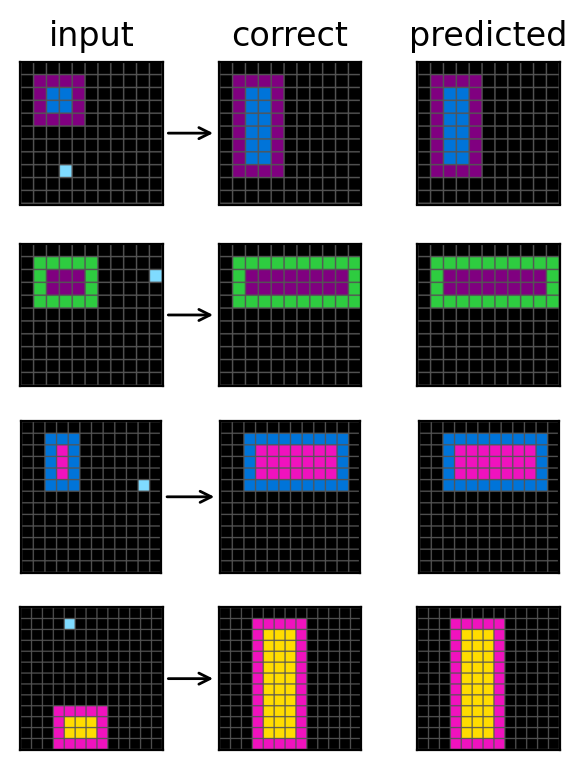

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    grid = [row[:] for row in grid_lst]
    rows, cols = (len(grid), len(grid[0]))
    min_row, max_row = (rows, 0)
    min_col, max_col = (cols, 0)
    for r in range(rows):
        for c in range(cols):
            if grid[r][c] != 0:
                if r < min_row:
                    min_row = r
                if r > max_row:
                    max_row = r
                if c < min_col:
                    min_col = c
                if c > max_col:
                    max_col = c
    border_colors = {}
    inner_colors = {}
    for r in range(min_row, max_row + 1):
        for c in range(min_col, max_col + 1):
            if r == min_row or r == max_row or c == min_col or (c == max_col):
                color = grid[r][c]
                if color != 0:
                    if color in border_colors:
                        border_colors[color] += 1
                    else:
                        border_colors[color] 

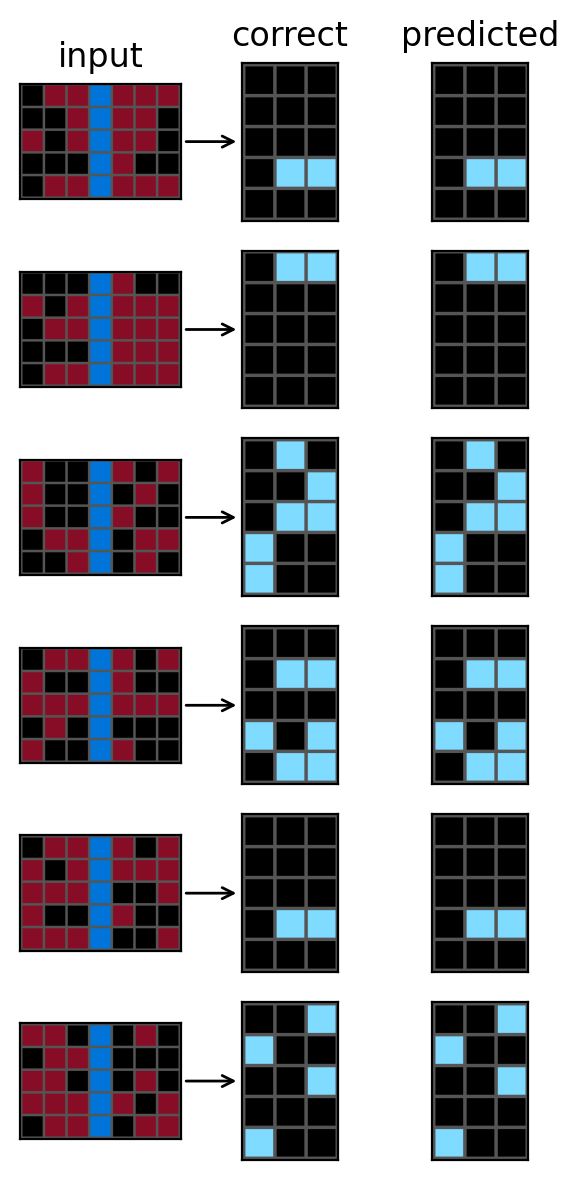

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    output_grid = [[0, 0, 0] for _ in range(5)]
    for row_idx, row in enumerate(grid_lst):
        for col in range(3):
            if row[col] == 0 and row[col + 4] == 0:
                output_grid[row_idx][col] = 8
    return output_grid
--------------------
----------------------------------------------------------------------------------------------------------------------------------------------------------------


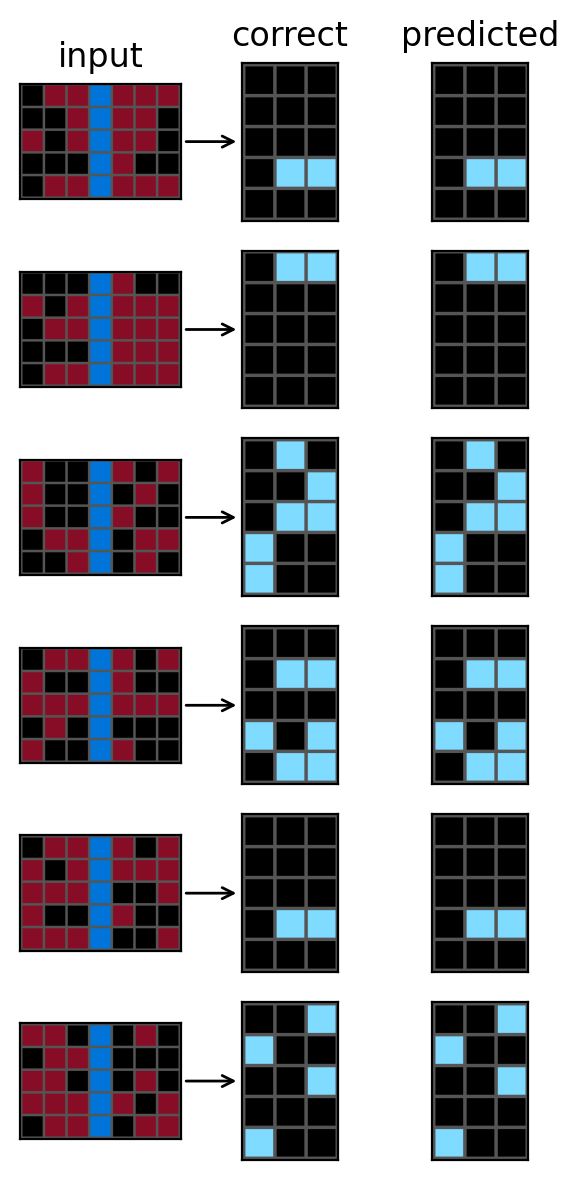

def transform(grid_lst: list[list[int]]) -> list[list[int]]:
    blue_color = 1
    purple_color = 8
    output_grid = [[0] * 3 for _ in range(len(grid_lst))]
    blue_positions = [i for i, row in enumerate(grid_lst) for j, cell in enumerate(row) if cell == blue_color and j == 3]
    for i in blue_positions:
        for j in range(3):
            if grid_lst[i][j] == 0 and grid_lst[i][j + 4] == 0:
                output_grid[i][j] = purple_color
    return output_grid
--------------------


In [2]:
from soar.render import show_train_test_gt
import numpy as np

for k in np.random.choice(list(dict_solutions.keys()),size=5):
    print("=="*20)
    print(f"Task ID: {k}")
    print("=="*20)
    dic_resp_k=dict_solutions[k]
    list_unique_code=[]
    list_resp=[]
    task = data2test[k]
       
            
    for resp in dic_resp_k[:2]:
        try:
            show_train_test_gt(resp,task)
        except Exception as e:
            print(f"Error displaying task {k}: {e}")
            continue
        print(resp['code'])
        print("-"*20)